<a href="https://colab.research.google.com/github/Isenlith/ProcImag/blob/master/Radix_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
def bit_reverse_traverse(a):
    # (c) 2014 Ryan Compton
    # ryancompton.net/2014/06/05/bit-reversal-permutation-in-python/
    n = a.shape[0]
    assert(not n&(n-1) ) # assert that n is a power of 2
    if n == 1:
        yield a[0]
    else:
        even_index = np.arange(int(n/2))*2
        odd_index = np.arange(int(n/2))*2 + 1
        for even in bit_reverse_traverse(a[even_index]):
            yield even
        for odd in bit_reverse_traverse(a[odd_index]):
            yield odd
 
def get_bit_reversed_list(l):
    # (c) 2014 Ryan Compton
    # ryancompton.net/2014/06/05/bit-reversal-permutation-in-python/
    n = len(l)
    indexs = np.arange(n)
    b = []
    for i in bit_reverse_traverse(indexs):
        b.append(l[i])
    return b

## Criando o Sinal

<Figure size 432x288 with 0 Axes>

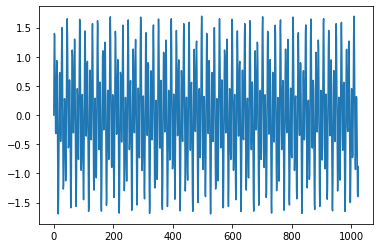

<Figure size 432x288 with 0 Axes>

In [107]:
fs = 1024
tf = 1
t = np.arange(0, tf, 1/fs)
x = 0.7 * np.sin(2 * np.pi * t * 50) + np.sin(2 * np.pi * t * 120)

plt.plot(x)
plt.figure()

##Radix-2 para um sinal com (2^n) amostras

In [0]:
x_fft = get_bit_reversed_list(x)
level = np.log2(N)
m = np.arange(0, N/2)
phase = np.cos(2*np.pi/N*m) - 1j*np.sin(2*np.pi/N*m)

for a in range(1, int(level+1)):
  L = 2**a
  phase_level = phase[0:int(N/2):int(N/L)]
  for k in range(0, N-L+1, L):
    for n in range(0, int(L/2)):
      first  = x_fft[n+k]
      second = x_fft[n + k + int(L/2)] * phase_level[n]
      x_fft[n+k]            = first + second
      x_fft[n+k + int(L/2)] = first - second

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Magnitude da Resposta em Frequencia')

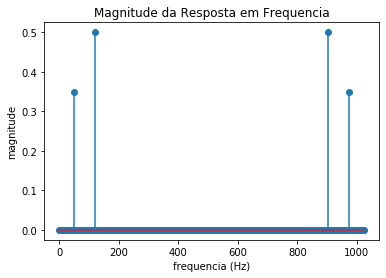

In [143]:
m = np.arange(0, len(x_fft))
res = m*fs/len(x_fft)
plt.stem(res, np.abs(x_fft)/len(x_fft))
plt.ylabel('magnitude')
plt.xlabel('frequencia (Hz)')
plt.title('Magnitude da Resposta em Frequencia')